In [1]:

import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.constraints import MaxNorm
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score,matthews_corrcoef
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

In [2]:
dataset = pd.read_csv(r'C:\Users\ktpro\Downloads\CustomerChurn_dataset.csv')

In [3]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
num = dataset.select_dtypes(include = "number")
catdata = dataset.select_dtypes(exclude = "number")

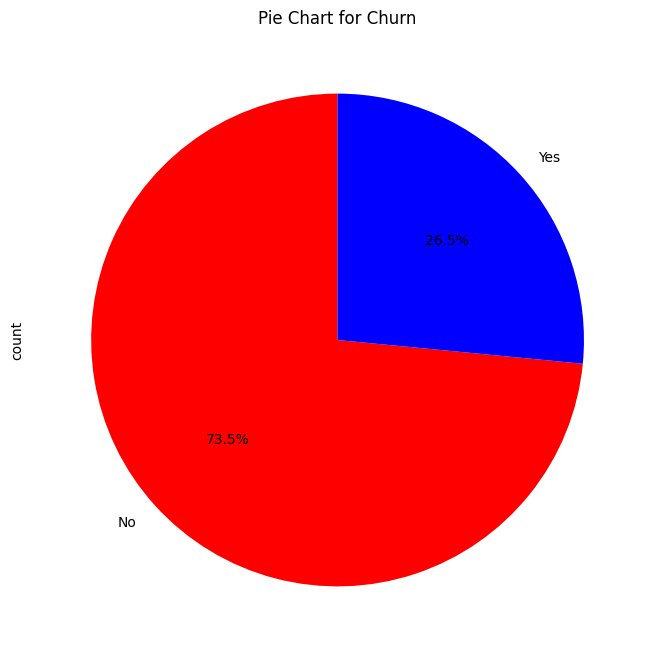

In [7]:
plt.figure(figsize=(8, 8))
dataset['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['Red', 'blue'])
plt.title('Pie Chart for Churn')
plt.show()

26.5% of customers churn  while 73.5% do not

In [39]:
label_encoder = LabelEncoder()

for column in catdata.columns:
        catdata[column] = label_encoder.fit_transform(catdata[column])

c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [9]:
catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int32
 1   gender            7043 non-null   int32
 2   Partner           7043 non-null   int32
 3   Dependents        7043 non-null   int32
 4   PhoneService      7043 non-null   int32
 5   MultipleLines     7043 non-null   int32
 6   InternetService   7043 non-null   int32
 7   OnlineSecurity    7043 non-null   int32
 8   OnlineBackup      7043 non-null   int32
 9   DeviceProtection  7043 non-null   int32
 10  TechSupport       7043 non-null   int32
 11  StreamingTV       7043 non-null   int32
 12  StreamingMovies   7043 non-null   int32
 13  Contract          7043 non-null   int32
 14  PaperlessBilling  7043 non-null   int32
 15  PaymentMethod     7043 non-null   int32
 16  TotalCharges      7043 non-null   int32
 17  Churn             7043 non-null  

In [10]:
dataset = pd.concat([num, catdata], axis=1)
dataset

,SeniorCitizen,tenure,MonthlyCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,29.85,5375,0,1,0,0,1,0,...,2,0,0,0,0,0,1,2,2505,0
1,0,34,56.95,3962,1,0,0,1,0,0,...,0,2,0,0,0,1,0,3,1466,0
2,0,2,53.85,2564,1,0,0,1,0,0,...,2,0,0,0,0,0,1,3,157,1
3,0,45,42.30,5535,1,0,0,0,1,0,...,0,2,2,0,0,1,0,0,1400,0
4,0,2,70.70,6511,0,0,0,1,0,1,...,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,4853,1,1,1,1,2,0,...,0,2,2,2,2,1,1,3,1597,0
7039,0,72,103.20,1525,0,1,1,1,2,1,...,2,2,0,2,2,1,1,1,5698,0
7040,0,11,29.60,3367,0,1,1,0,1,0,...,0,0,0,0,0,0,1,2,2994,0
7041,1,4,74.40,5934,1,1,0,1,2,1,...,0,0,0,0,0,0,1,3,2660,1


In [11]:
X = dataset.drop(columns=['customerID', 'Churn'])  #ID was dropped since it acts as only an identifier and does not affect churning
y = dataset['Churn']# dependent variable

C:\Users\ktpro\AppData\Local\Temp\ipykernel_17136\334569186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Churn'], y=dataset[variable], ax=subplot, palette='Set3').set_title(str(variable))
C:\Users\ktpro\AppData\Local\Temp\ipykernel_17136\334569186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Churn'], y=dataset[variable], ax=subplot, palette='Set3').set_title(str(variable))
C:\Users\ktpro\AppData\Local\Temp\ipykernel_17136\334569186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Churn'], y=d

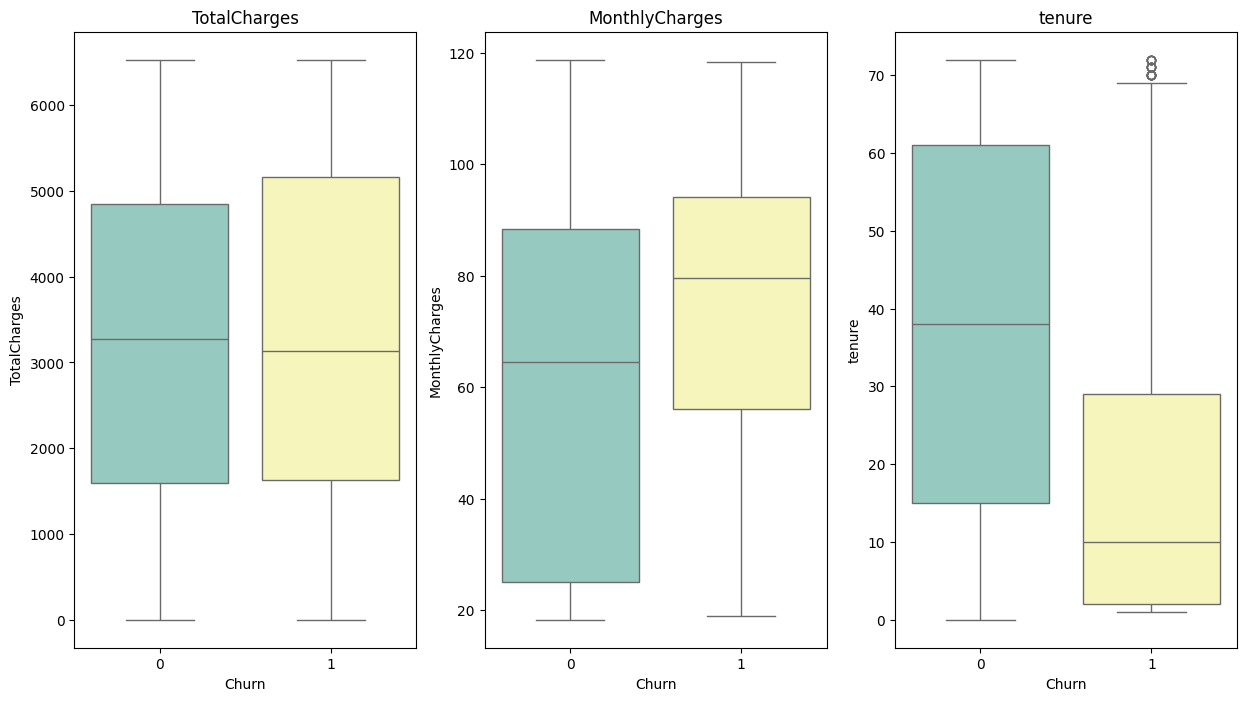

In [12]:

import seaborn as sns
numericals = ['TotalCharges', 'MonthlyCharges', 'tenure','Contract']

fig, ax = plt.subplots(1, 3, figsize=(15,8))
for variable, subplot in zip(numericals, ax.flatten()):
  sns.boxplot(x=dataset['Churn'], y=dataset[variable], ax=subplot, palette='Set3').set_title(str(variable))

<Axes: xlabel='Contract', ylabel='count'>

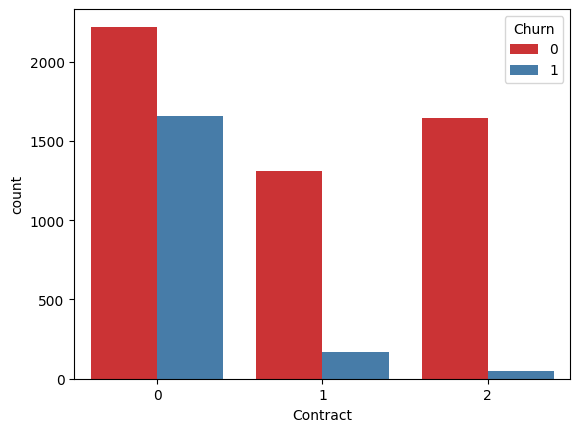

In [13]:
Categorical = ['Month-to-month', 'Two year', 'One year']

sns.countplot(x=dataset['Contract'], hue=dataset['Churn'], palette = "Set1")

From the graph, it is seen that the longer the period for the contract, the less likely to churn

In [14]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

RandomForestClassifier(random_state=42)

In [15]:

feature_importance = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [16]:
feature_importance_df

,Feature,Importance
1,tenure,0.182951
2,MonthlyCharges,0.174232
18,TotalCharges,0.166883
15,Contract,0.074679
17,PaymentMethod,0.051873
9,OnlineSecurity,0.050016
12,TechSupport,0.041227
3,gender,0.027932
10,OnlineBackup,0.027507
16,PaperlessBilling,0.025847


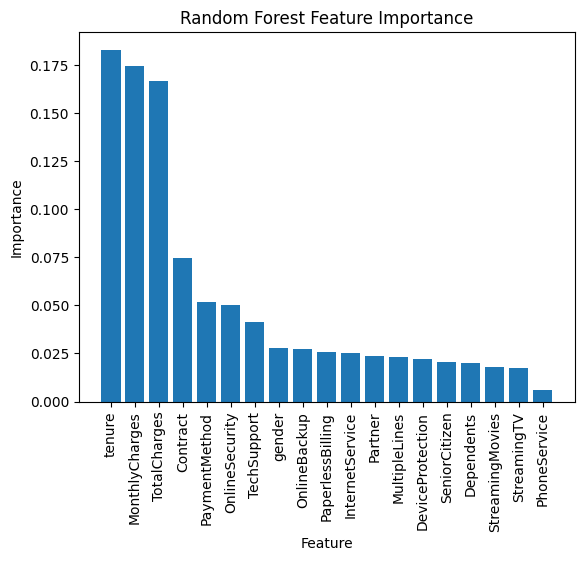

In [17]:
# Plot the feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation='vertical')
plt.show()

In [18]:
relevant_features = feature_importance_df[feature_importance_df['Importance'] > 0.03]['Feature'].tolist()
relevant_features.append('Churn')

In [19]:
dataset2= dataset[relevant_features]

In [20]:
dataset2

,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,OnlineSecurity,TechSupport,Churn
0,1,29.85,2505,0,2,0,0,0
1,34,56.95,1466,1,3,2,0,0
2,2,53.85,157,0,3,2,0,1
3,45,42.30,1400,1,0,2,2,0
4,2,70.70,925,0,2,0,0,1
...,...,...,...,...,...,...,...,...
7038,24,84.80,1597,1,3,2,2,0
7039,72,103.20,5698,1,1,0,0,0
7040,11,29.60,2994,0,2,2,0,0
7041,4,74.40,2660,0,3,0,0,1


In [21]:
dataset3 = dataset[relevant_features]

In [22]:
dataset3 = dataset3.drop(columns=['Churn'])

In [23]:
dataset3

,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,OnlineSecurity,TechSupport
0,1,29.85,2505,0,2,0,0
1,34,56.95,1466,1,3,2,0
2,2,53.85,157,0,3,2,0
3,45,42.30,1400,1,0,2,2
4,2,70.70,925,0,2,0,0
...,...,...,...,...,...,...,...
7038,24,84.80,1597,1,3,2,2
7039,72,103.20,5698,1,1,0,0
7040,11,29.60,2994,0,2,2,0
7041,4,74.40,2660,0,3,0,0


In [24]:
customer_profiles = dataset.groupby(['SeniorCitizen', 'gender', 'Partner', 'Dependents']).mean()


churn_profiles = customer_profiles.sort_values(by='Churn', ascending=True)

In [25]:
churn_profiles

tenure  MonthlyCharges  \
SeniorCitizen gender Partner Dependents                              
0             1      1       1           41.574209       60.756265   
              0      1       1           40.604265       59.016351   
                             0           43.315436       69.961913   
1             1      0       1           22.600000       65.140000   
0             1      0       1           25.137441       49.825355   
1             0      1       1           44.256410       80.869231   
0             0      0       1           22.042254       55.201408   
              1      1       0           43.975309       73.530423   
1             1      1       1           49.454545       84.802273   
0             1      0       0           22.892107       58.981282   
              0      0       0           22.962631       61.297720   
1             0      0       1           21.333333       92.550000   
                     1       0           42.334928       85.157895   
              1      1       0           39.145907       80.964947   
                     0       0           25.434426       74.903074   
              0      0       0           24.892744       78.362145   

                                          customerID  PhoneService  \
SeniorCitizen gender Partner Dependents                              
0             1      1       1           3475.272506      0.911192   
              0      1       1           3439.995261      0.905213   
                             0           3424.961409      0.912752   
1             1      0       1           1675.200000      1.000000   
0             1      0       1           3548.521327      0.881517   
1             0      1       1           3737.564103      0.846154   
0             0      0       1           3571.669014      0.866197   
              1      1       0           3499.495591      0.902998   
1             1      1       1           3605.159091      0.931818   
0             1      0       0           3565.574222      0.899348   
              0      0       0           3604.541106      0.899103   
1             0      0       1           5495.333333      1.000000   
                     1       0           3408.162679      0.947368   
              1      1       0           3505.192171      0.889680   
                     0       0           3674.278689      0.897541   
              0      0       0           3428.990536      0.911672   

                                         MultipleLines  InternetService  \
SeniorCitizen gender Partner Dependents                                   
0             1      1       1                0.920925         0.919708   
              0      1       1                0.931280         0.953791   
                             0                1.127517         0.852349   
1             1      0       1                0.400000         0.400000   
0             1      0       1                0.687204         0.957346   
1             0      1       1                1.282051         0.589744   
0             0      0       1                0.697183         0.845070   
              1      1       0                1.183422         0.751323   
1             1      1       1                1.477273         0.840909   
0             1      0       0                0.734975         0.903693   
              0      0       0                0.781016         0.857997   
1             0      0       1                1.333333         1.000000   
                     1       0                1.392344         0.880383   
              1      1       0                1.362989         0.829181   
                     0       0                1.159836         0.807377   
              0      0       0                1.123028         0.807571   

                                         OnlineSecurity  OnlineBackup  \
SeniorCitizen gender Partner Dependents                                 
0             1      1   

In [26]:


# Group by categorical features and calculate churn rate
catfeatures = ['Contract','PaymentMethod', 'OnlineSecurity', 'TechSupport']
for feature in catfeatures:
    churnrate = dataset2.groupby([feature, 'Churn']).size().unstack().fillna(0)
    churnrate['Churn Rate'] = churnrate[1] / (churnrate[0] + churnrate[1])
    print("Churn Rate by ",feature, " : ")
    print(churnrate)

Churn Rate by  Contract  : 
Churn        0     1  Churn Rate
Contract                        
0         2220  1655    0.427097
1         1307   166    0.112695
2         1647    48    0.028319
Churn Rate by  PaymentMethod  : 
Churn             0     1  Churn Rate
PaymentMethod                        
0              1286   258    0.167098
1              1290   232    0.152431
2              1294  1071    0.452854
3              1304   308    0.191067
Churn Rate by  OnlineSecurity  : 
Churn              0     1  Churn Rate
OnlineSecurity                        
0               2037  1461    0.417667
1               1413   113    0.074050
2               1724   295    0.146112
Churn Rate by  TechSupport  : 
Churn           0     1  Churn Rate
TechSupport                        
0            2027  1446    0.416355
1            1413   113    0.074050
2            1734   310    0.151663


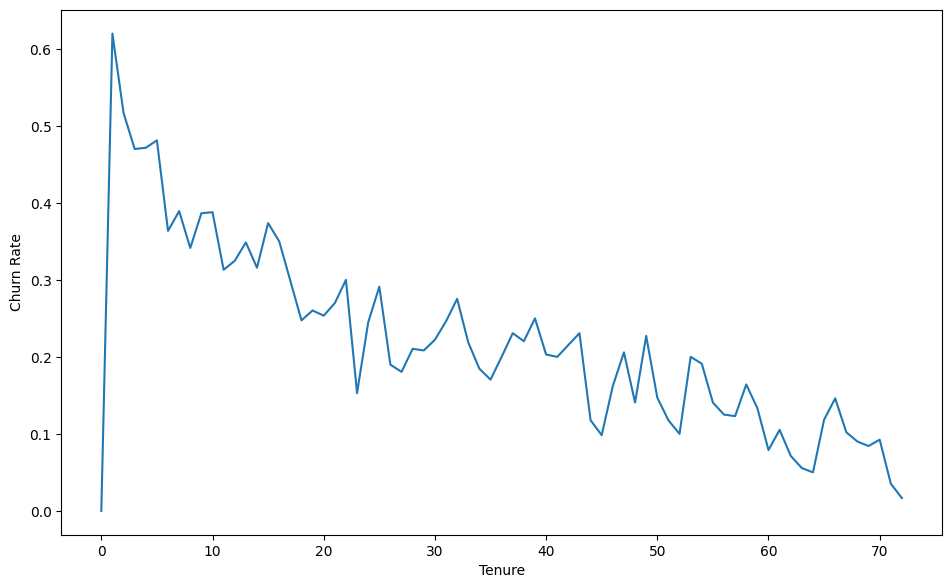

In [27]:
plt.figure(figsize=(25, 15))


plt.subplot(2, 2, 1)
tenurerate = dataset2.groupby(['tenure', 'Churn']).size().unstack().fillna(0)
tenurerate['Churn Rate'] = tenurerate[1] / (tenurerate[0] + tenurerate[1])
plt.plot(tenurerate['Churn Rate'], label='Churn Rate')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')


plt.show()

In [28]:


X = dataset3
y = dataset2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [30]:

def create_model(optimizer='adam',hidden_layer1_units=64,hidden_layer2_units=32):
  input_layer = Input(shape=(X_train.shape[1],))
  hidden_layer_1 = Dense(32, activation='relu')(input_layer)
  hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
  hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
  output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

  model = Model(inputs=input_layer, outputs=output_layer)

  model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
  return model










In [31]:
  # Wrap the Keras model using KerasClassifier
model = KerasClassifier(model=create_model, epochs=100, batch_size=32, verbose=0, hidden_layer1_units=32, hidden_layer2_units=16)



In [32]:
param_grid = {
    'optimizer':['adam','sgd','rmsprop'],
    'hidden_layer1_units':[32,64,128],
    'hidden_layer2_units':[16,32,64]
}


outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

auc_scorer=make_scorer(roc_auc_score, greater_is_better=True)


In [33]:
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=auc_scorer, cv=outer_cv, verbose=1, error_score='raise', n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Epoch 1/100


c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

177/177 [==============================] - 1s 2ms/step - loss: 29.3578 - accuracy: 0.6947 - val_loss: 0.7586 - val_accuracy: 0.6998
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.7286 - val_loss: 0.5346 - val_accuracy: 0.7566
Epoch 3/100
177/177 [==============================] - 0s 996us/step - loss: 0.5897 - accuracy: 0.7465 - val_loss: 0.5265 - val_accuracy: 0.7537
Epoch 4/100
177/177 [==============================] - 0s 989us/step - loss: 0.5581 - accuracy: 0.7524 - val_loss: 0.5011 - val_accuracy: 0.7615
Epoch 5/100
177/177 [==============================] - 0s 985us/step - loss: 0.5542 - accuracy: 0.7533 - val_loss: 0.7974 - val_accuracy: 0.6061
Epoch 6/100
177/177 [==============================] - 0s 980us/step - loss: 0.5485 - accuracy: 0.7499 - val_loss: 0.4832 - val_accuracy: 0.7686
Epoch 7/100
177/177 [==============================] - 0s 979us/step - loss: 0.5357 - accuracy: 0.7545 - val_loss: 0.4764 - val_accuracy: 0.7630


In [34]:
print(f'Best Parameters: {grid_result.best_params_}')
print(f'Best AUC Score: {grid_result.best_score_}')

#Evaluate the best model on the test set
best_model=grid_result.best_estimator_
y_pred=best_model.predict(X_test)
y_pred_binary=(y_pred>0.5).astype(int)
accuracy_best=accuracy_score(y_test,y_pred_binary)
auc_score_best=roc_auc_score(y_test,y_pred)
print(f'Test Accuracy (Best Model): {accuracy_best}')
print(f'AUC Score (Best Model): {auc_score_best}')

Best Parameters: {'hidden_layer1_units': 128, 'hidden_layer2_units': 32, 'optimizer': 'adam'}
Best AUC Score: 0.7173322598459551
Test Accuracy (Best Model): 0.8019872249822569
AUC Score (Best Model): 0.7212274990425126


c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [35]:
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

optimized_model = Model(inputs=input_layer, outputs=output_layer)
optimized_model.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9), loss='binary_crossentropy', metrics=['accuracy'])


optimized_model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

y_optimized_pred=optimized_model.predict(X_test)
y_pred_optimized_binary=(y_pred>0.5).astype(int)

accuracy_optimized=accuracy_score(y_test,y_pred_optimized_binary)
auc_score_optimized=roc_auc_score(y_test,y_optimized_pred)

print(f'Test Accuracy (Optimized Model): {accuracy_optimized}')
print(f'AUC Score (Optimized Model): {auc_score_optimized}')

Epoch 1/100
177/177 [==============================] - 0s 722us/step - loss: 9.2847 - accuracy: 0.6349
Epoch 2/100
177/177 [==============================] - 0s 717us/step - loss: 7.6876 - accuracy: 0.6393
Epoch 3/100
177/177 [==============================] - 0s 708us/step - loss: 6.5424 - accuracy: 0.6560
Epoch 4/100
177/177 [==============================] - 0s 720us/step - loss: 5.5969 - accuracy: 0.6542
Epoch 5/100
177/177 [==============================] - 0s 713us/step - loss: 3.9365 - accuracy: 0.6328
Epoch 6/100
177/177 [==============================] - 0s 735us/step - loss: 3.1869 - accuracy: 0.6470
Epoch 7/100
177/177 [==============================] - 0s 772us/step - loss: 2.5971 - accuracy: 0.6699
Epoch 8/100
177/177 [==============================] - 0s 742us/step - loss: 2.2296 - accuracy: 0.6787
Epoch 9/100
177/177 [==============================] - 0s 711us/step - loss: 1.9935 - accuracy: 0.6867
Epoch 10/100
177/177 [==============================] - 0s 739us/step - l

c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ktpro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [40]:
import pickle

with open(r'C:\Users\ktpro\Downloads\optimized_model.pkl', 'wb') as model_file:
    pickle.dump(optimized_model, model_file)

# Save the scaler
with open(r'C:\Users\ktpro\Downloads\scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open(r'C:\Users\ktpro\Downloads\label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder,file )


INFO:tensorflow:Assets written to: C:\Users\ktpro\AppData\Local\Temp\tmp0fk0qq0_\assets


INFO:tensorflow:Assets written to: C:\Users\ktpro\AppData\Local\Temp\tmp0fk0qq0_\assets
